<a href="https://colab.research.google.com/github/aishikasaha/evergreen_classification/blob/main/internship1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd

import tensorflow as tf
import keras.backend as K
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras import regularizers


!pip install transformers
from transformers import *
from transformers import TFDistilBertModel, DistilBertTokenizer, DistilBertConfig

     |████████████████████████████████| 1.9MB 6.3MB/s 
     |████████████████████████████████| 890kB 38.8MB/s 
     |████████████████████████████████| 3.2MB 37.4MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=85a607eb85e97458d015819ab1bb02d6b4fc3be5714ecb98cd0ab8c0cd9567f9
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
#Pre-processing Libraries and downloads
import nltk 
import re
nltk.download('words')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words = list(stop_words)

In [ ]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()

In [ ]:
from nltk import word_tokenize

import string
print(string.punctuation)
words = set(nltk.corpus.words.words())
words = list(words)
def remove(list): 
    pattern = '[0-9]'
    list = [re.sub(pattern, '', i) for i in list] 
    pattern1 = '[a-z]'
    return list

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [ ]:

from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
#Importing Training and Validation Dataset
train_ds = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.tsv',sep='\t')
# Boilerplate Data
boilerplate_data = train_ds.iloc[:,[2,-1]].values
text_list = list(boilerplate_data[:,0])

In [ ]:
train_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7395 entries, 0 to 7394
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             7395 non-null   object 
 1   urlid                           7395 non-null   int64  
 2   boilerplate                     7395 non-null   object 
 3   alchemy_category                7395 non-null   object 
 4   alchemy_category_score          7395 non-null   object 
 5   avglinksize                     7395 non-null   float64
 6   commonlinkratio_1               7395 non-null   float64
 7   commonlinkratio_2               7395 non-null   float64
 8   commonlinkratio_3               7395 non-null   float64
 9   commonlinkratio_4               7395 non-null   float64
 10  compression_ratio               7395 non-null   float64
 11  embed_ratio                     7395 non-null   float64
 12  framebased                      73

In [ ]:
#Importing Test Dataset
test_ds = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.tsv',sep='\t')    
boilerplate_test_data = test_ds.iloc[:,2].values
test_text_list = list(boilerplate_test_data)

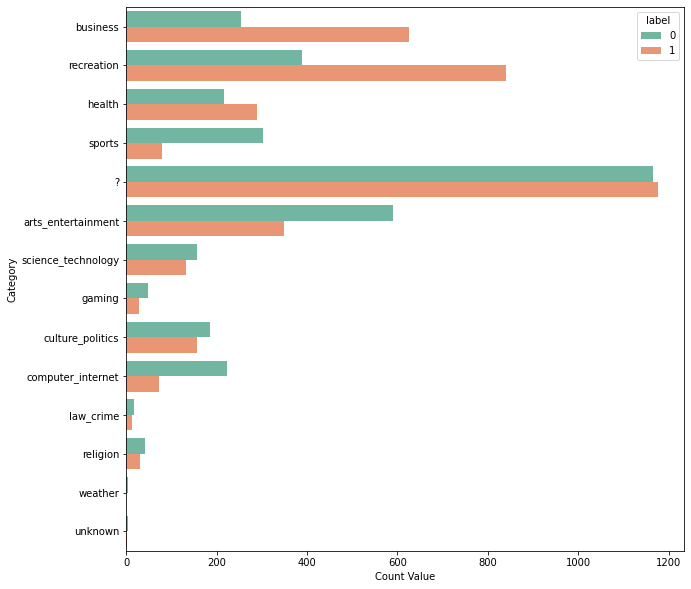

In [ ]:
# Visualiztion to infer the Alchemy Categories corresponding to each of the labels
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.countplot(y = train_ds['alchemy_category'], hue =train_ds['label'], palette = "Set2");
plt.xlabel('Count Value')
plt.ylabel('Category');

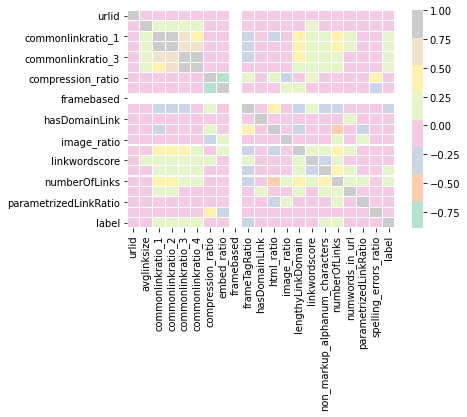

In [ ]:
# Trying to see if there's any correlations 
corr = train_ds.corr()
sns.heatmap(corr, linewidths = 0.1, cmap = 'Pastel2')

In [ ]:
# Train Validation Split
train, val = train_test_split(boilerplate_data, test_size=0.2)

In [ ]:

text_data = train_ds['boilerplate']
y_lab = train_ds['label']

In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, classification_report
tfv = TfidfVectorizer(min_df = 3,  
                      max_features = None, 
                      strip_accents = 'unicode',  
                      analyzer = 'word',
                      token_pattern = r'\w{1,}',
                      ngram_range = (1, 2), 
                      use_idf = 1,
                      smooth_idf = 1,
                      sublinear_tf = 1)

tfv.fit(text_data)
X = tfv.transform(text_data)

In [ ]:
lr = LogisticRegression(penalty = 'l2',  
                        tol = 0.0001, 
                        C = 1, 
                        fit_intercept = True, 
                        intercept_scaling = 1.0, 
                        class_weight = None, 
                        random_state = None)

In [ ]:
train_X, val_X, train_y, val_y = train_test_split(X, y_lab, test_size = 0.25)

In [ ]:
lr.fit(train_X, train_y)
pred_lr = lr.predict(val_X)
print(classification_report(val_y, pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.88      0.81       874
           1       0.87      0.73      0.79       975

    accuracy                           0.80      1849
   macro avg       0.81      0.80      0.80      1849
weighted avg       0.81      0.80      0.80      1849



In [ ]:
def cleanText(text):
  
  list_stopwords = stopwords.words('english')
  words = text.split() 
  clean_words = [word for word in words if (word not in list_stopwords) and len(word) > 2]
  return " ".join(clean_words)

def preprocessText(text):
  
  text = text.lower().strip()
  text = re.sub(r"([?.!,¿])", r" ", text)
  text = re.sub(r'[" "]+', " ", text)
  text = re.sub(r"[^a-zA-Z?.!,¿]+", " ", text)
  text = cleanText(text)
  text = re.sub(r'@\w+', '',text)
  return text

In [ ]:
data = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.tsv',sep='\t',  usecols = ['boilerplate', 'label'])
data_test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.tsv',sep='\t', usecols = ['urlid', 'boilerplate'])

In [ ]:
data = shuffle(data)

In [ ]:
data['boilerplate'] = data['boilerplate'].map(preprocessText)
data_test['boilerplate'] = data_test['boilerplate'].map(preprocessText)

In [ ]:
data.head()

,boilerplate,label
3244,title sham rock bakerella com body guessed min...,0
7021,title seasaltwithfood chinese orange chicken b...,1
4115,title chocolate coffee cake chocolate cake cof...,1
6038,title fact fiction smash myths old wives tales...,0
4762,url mashable united continental pilots ipad ti...,0


In [ ]:
data['boilerplate'][3]

'title foolproof tips better sleep body period life lot problems sleep took long fall asleep easily awaken simply getting enough rest night want take medication led learn several tips tricks really helped overcome insomnia tips try follow regularly worry getting enough sleep try worry much sleep worrying start cycle negative thoughts contribute condition known learned insomnia learned insomnia occurs worry much whether able get adequate sleep bedtime rituals behavior actually trigger insomnia force sleep attempt trying actually awakes making difficult sleep bed feeling really tired sleepy look alarm clock night looking clock promotes increased anxiety obsession time body heating procedures studies suggest soaking hot water going bed ease transition deeper sleep avoid oversleep oversleep make poor night sleep even couple days reset body clock make harder sleep night sex sex well known nighttime stress reliever healthy sex life enhances relationship relaxes body releases happy chemicals 

In [ ]:
data_test.head()

,urlid,boilerplate
0,5865,title homemade enchilada sauce lynn kitchen ad...
1,782,title lolpics stun grenade body funny pictures...
2,6962,title treadmills body treadmills stair climber...
3,7640,title father tactics used assad crush revolt t...
4,3589,title stem turns lemons limes juicy atomizers ...


In [ ]:
num_classes = 2

In [ ]:
dbert_tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['activation_13', 'vocab_layer_norm', 'vocab_transform', 'vocab_projector']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [ ]:
max_len = 32 # size of each batch of text input
boilerplate = data['boilerplate']
boilerplate_test = data_test['boilerplate']
labels = data['label']
len(boilerplate), len(labels)

(7395, 7395)

In [ ]:
dbert_inp = dbert_tokenizer.encode_plus(boilerplate[31],
                                        add_special_tokens = True,
                                        max_length = 32,
                                        padding = 'longest',
                                        truncation = True)
dbert_inp


{'input_ids': [101, 2516, 2878, 10500, 7967, 15775, 2072, 14163, 15379, 2015, 7842, 2615, 10736, 20323, 2303, 2228, 27952, 2135, 20223, 2094, 2048, 3134, 3283, 5630, 2785, 14163, 15379, 8670, 3489, 4167, 2833, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
id_inp = np.asarray(dbert_inp['input_ids'])
mask_inp = np.asarray(dbert_inp['attention_mask'])
out = dbert_model([id_inp.reshape(1,-1), mask_inp.reshape(1,-1)])

In [ ]:
dbert_tokenizer.decode(dbert_inp['input_ids'])

'[CLS] title whole wheat chocolate chai muffins savvy eats body think subconsciously sabotaged two weeks ago decide kind muffin bake brain food [SEP]'

In [ ]:
def instantiateModel():
    inps = Input(shape = (max_len,), dtype='int64')
    masks = Input(shape = (max_len,), dtype='int64')
    dbert_layer = dbert_model(inps, attention_mask=masks)[0][:,0,:]
    dense = Dense(512, activation='relu', kernel_regularizer = regularizers.l2(0.01))(dbert_layer)
    dropout = Dropout(0.6)(dense)
    pred = Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(0.01))(dropout)
    model = tf.keras.Model(inputs=[inps,masks], outputs = pred)
    print(model.summary())
    return model
  

In [ ]:
model = instantiateModel()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experi

In [ ]:
input_ids = []
attention_masks = []

for bt in boilerplate:
    dbert_inps = dbert_tokenizer.encode_plus(bt,
                                           add_special_tokens = True,
                                           max_length = max_len,
                                           pad_to_max_length = True,
                                           return_attention_mask = True,
                                           truncation=True)
    
    input_ids.append(dbert_inps['input_ids'])
    attention_masks.append(dbert_inps['attention_mask'])

input_ids = np.asarray(input_ids)
attention_masks = np.array(attention_masks)
labels = np.array(labels)


input_ids_test = []
attention_masks_test = []

for btt in boilerplate_test:
    dbert_inps_test = dbert_tokenizer.encode_plus(btt,
                                           add_special_tokens = True,
                                           max_length = max_len,
                                           pad_to_max_length = True,
                                           return_attention_mask = True,
                                           truncation=True)
    
    input_ids_test.append(dbert_inps_test['input_ids'])
    attention_masks_test.append(dbert_inps_test['attention_mask'])

input_ids_test = np.asarray(input_ids_test)
attention_masks_test = np.array(attention_masks_test)

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2155: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [ ]:
train_inp, val_inp, train_label, val_label, train_mask, val_mask = train_test_split(input_ids, 
                                                                                    labels,
                                                                                    attention_masks,
                                                                                    test_size=0.2)

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
optimizer = tf.keras.optimizers.Adam(learning_rate = 3e-5)

model.compile(loss = loss, optimizer = optimizer, metrics = [metric])

In [ ]:
history = model.fit(
    [train_inp,
     train_mask],
     train_label,
     batch_size = 32,
     epochs = 5,
     validation_data = ([val_inp,val_mask], val_label))

Epoch 1/5
185/185 [==============================] - 1126s 6s/step - loss: 6.5106 - accuracy: 0.7102 - val_loss: 5.7448 - val_accuracy: 0.7945
Epoch 2/5
185/185 [==============================] - 1113s 6s/step - loss: 5.4808 - accuracy: 0.8279 - val_loss: 4.9371 - val_accuracy: 0.7972
Epoch 3/5
185/185 [==============================] - 1110s 6s/step - loss: 4.6200 - accuracy: 0.8701 - val_loss: 4.2750 - val_accuracy: 0.7870
Epoch 4/5
185/185 [==============================] - 1119s 6s/step - loss: 3.8534 - accuracy: 0.9213 - val_loss: 3.9016 - val_accuracy: 0.7857
Epoch 5/5
185/185 [==============================] - 1125s 6s/step - loss: 3.1912 - accuracy: 0.9505 - val_loss: 3.5028 - val_accuracy: 0.7863


In [ ]:
preds = model.predict([val_inp, val_mask], batch_size = 32)
pred_labels = preds.argmax(axis = 1)
f1 = f1_score(val_label, pred_labels)

In [ ]:
target_names = ['non-evergreen','evergreen']
print('F1 score:', f1)
print('Classification Report:')
print(classification_report(val_label, pred_labels, target_names = target_names))

F1 score: 0.7850340136054421
Classification Report:
               precision    recall  f1-score   support

non-evergreen       0.77      0.81      0.79       727
    evergreen       0.80      0.77      0.79       752

     accuracy                           0.79      1479
    macro avg       0.79      0.79      0.79      1479
 weighted avg       0.79      0.79      0.79      1479



In [ ]:
test_pred = model.predict([input_ids_test, attention_masks_test], batch_size=32)
test_pred = test_pred.argmax(axis=1)
print(test_pred)

[1 0 1 ... 0 1 1]


In [ ]:
data_test['label'] = test_pred
data_test.to_csv('submission.csv', columns = ['urlid', 'label'], index = False)

In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>